# Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

In [5]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [7]:
# Read the data from csv file

bk = pd.read_csv('day.csv')

In [8]:
# Check the shape of the dataframe

bk.shape

(730, 16)

In [9]:
# Check the head of the dataframe
 
bk.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Describe the columns of the dataframe

bk.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### We can assume that data has no outliers since difference between mean and median values is significantly low

In [11]:
# Info of the dataframe

bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
# Check for null values in the columns of the dataframe

bk.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### No null values in any data columns

In [13]:
# Copy the dataframe into new and drop the duplicates

bk_copy = bk.copy()
bk_copy.drop_duplicates(inplace=True)

In [14]:
bk.shape

(730, 16)

In [15]:
bk_copy.shape

(730, 16)

#### No duplicates found in the data

### Removing irrelevant and insignificant columns

In [16]:
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered is the category wise breakup for cnt column. Hence we will drop these columns

bk.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [17]:
# Label Encoding the required columns

bk.season = bk.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bk.weekday = bk.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bk.weathersit = bk.weathersit.map({1:'Clear',2:'Mist & Cloudy', 3:'Light Snow or Rain',4:'Heavy Snow or Rain'})
bk.mnth = bk.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [18]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2: Data Visualization

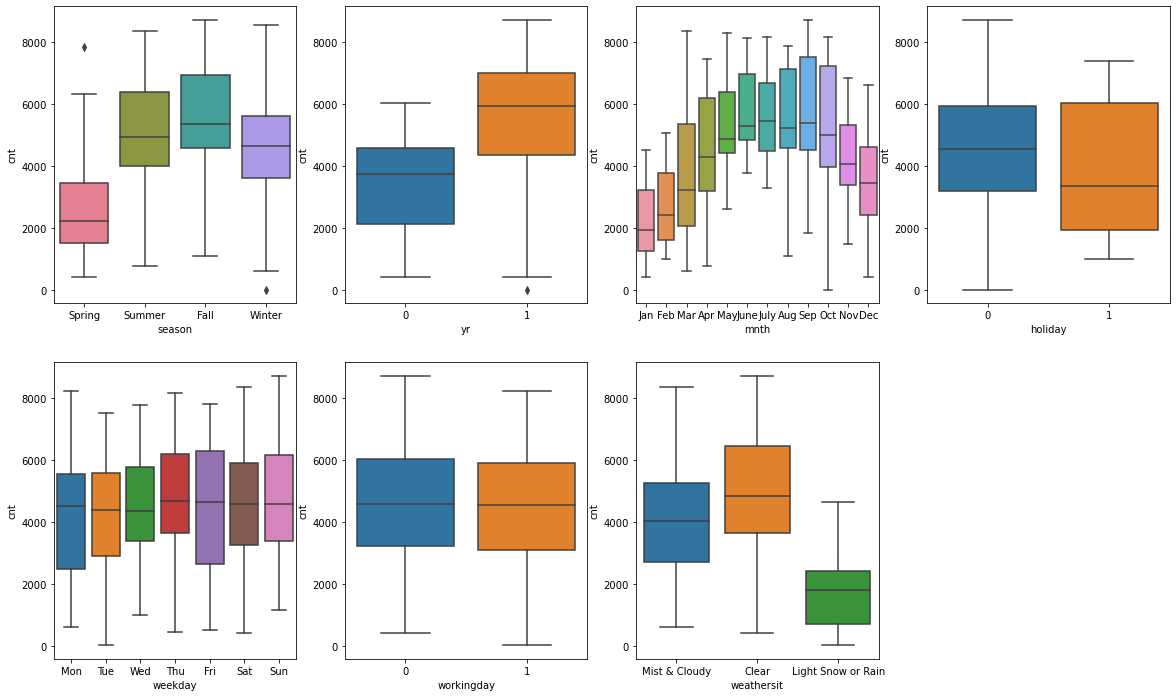

In [19]:
# Visualizing the categorical columns to view predictor variable vs target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bk, palette='husl')
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bk)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bk)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bk)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bk)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bk)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bk)
plt.show()

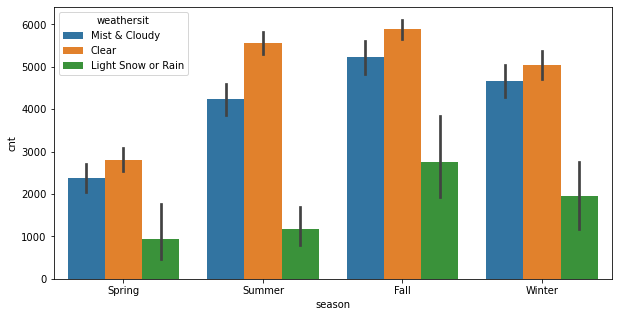

In [20]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'season', y = 'cnt', hue = 'weathersit', data = bk)
plt.show()

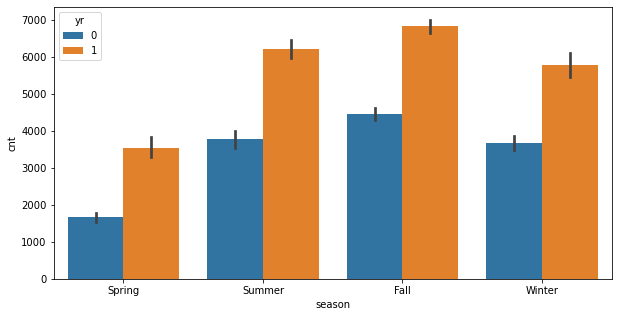

In [21]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'season', y = 'cnt', hue = 'yr', data = bk)
plt.show()

#### Observation - There is high demand for bike rentals for - 

1. Clear weather 
2. Summer & Fall seasons
3. Months June to Oct
4. Non Holiday
5. Year 2019

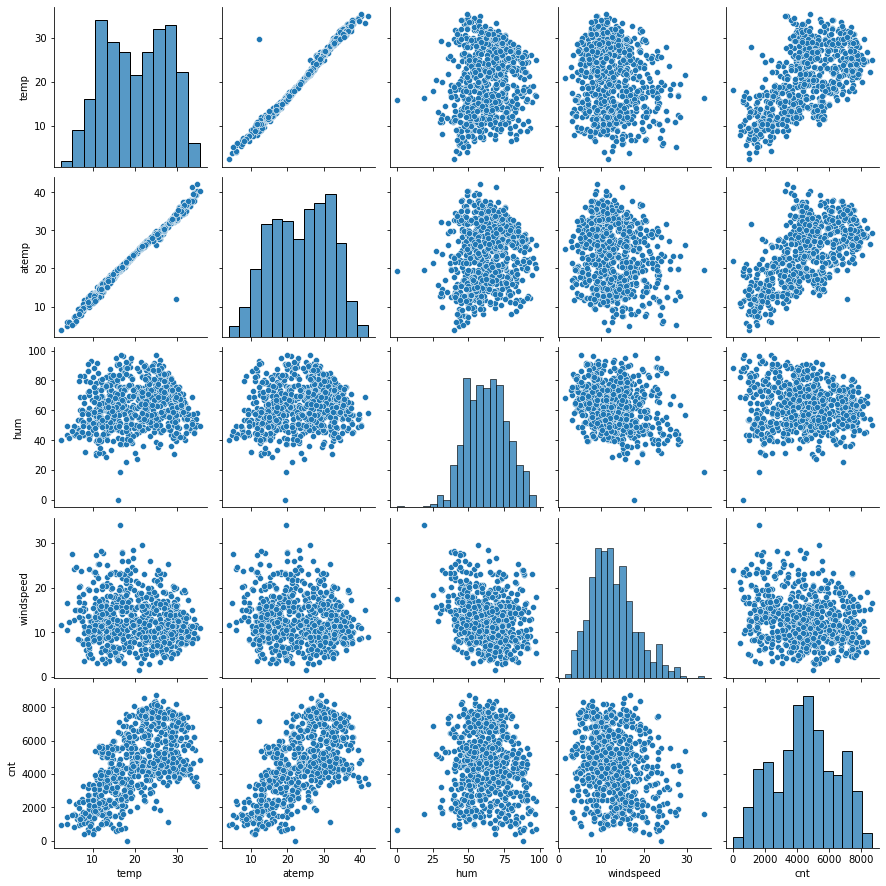

In [22]:
# Visualizing the numerical columns

sns.pairplot(data=bk,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

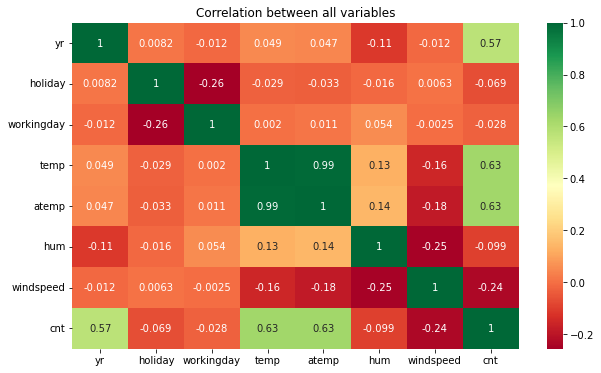

In [23]:
# Correlation between all variables

plt.figure(figsize = (10,6))
sns.heatmap(bk.corr(), annot = True, cmap="RdYlGn")
plt.title("Correlation between all variables")
plt.show()

#### Observation 1 - It can be clearly seen that there is linear relationship between temp and atemp. Hence, both of the variables cannot be used in the model due to multicollinearity. Going forward we will decide which variable to drop based upon VIF and p-value w.r.t other variables.
#### Observation 2 - cnt has good correlation with temp, atemp & yr

## Step 3: Data Preparation

In [24]:
# Dummy variable creation for variables - mnth, weekday, weathersit and season

dummy = pd.get_dummies(bk[['season','mnth','weekday','weathersit']], drop_first=True)
dummy.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow or Rain,weathersit_Mist & Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
bk = pd.concat([bk,dummy], axis=1)   #Axis=1 is for horizontal stacking
bk = bk.drop(['season','mnth','weekday','weathersit'], axis=1)
bk.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow or Rain,weathersit_Mist & Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [26]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bk_train, bk_test = train_test_split(bk, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
print(bk_train.shape, bk_test.shape)

(510, 30) (219, 30)


### Rescaling the Features 

In [28]:
# We will use Min-Max scaling (Normalization) here since it can handle outliers better

scaler = MinMaxScaler() # Instantiate an object

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']

bk_train[num_vars] = scaler.fit_transform(bk_train[num_vars])

In [29]:
bk_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow or Rain,weathersit_Mist & Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [30]:
bk_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow or Rain,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


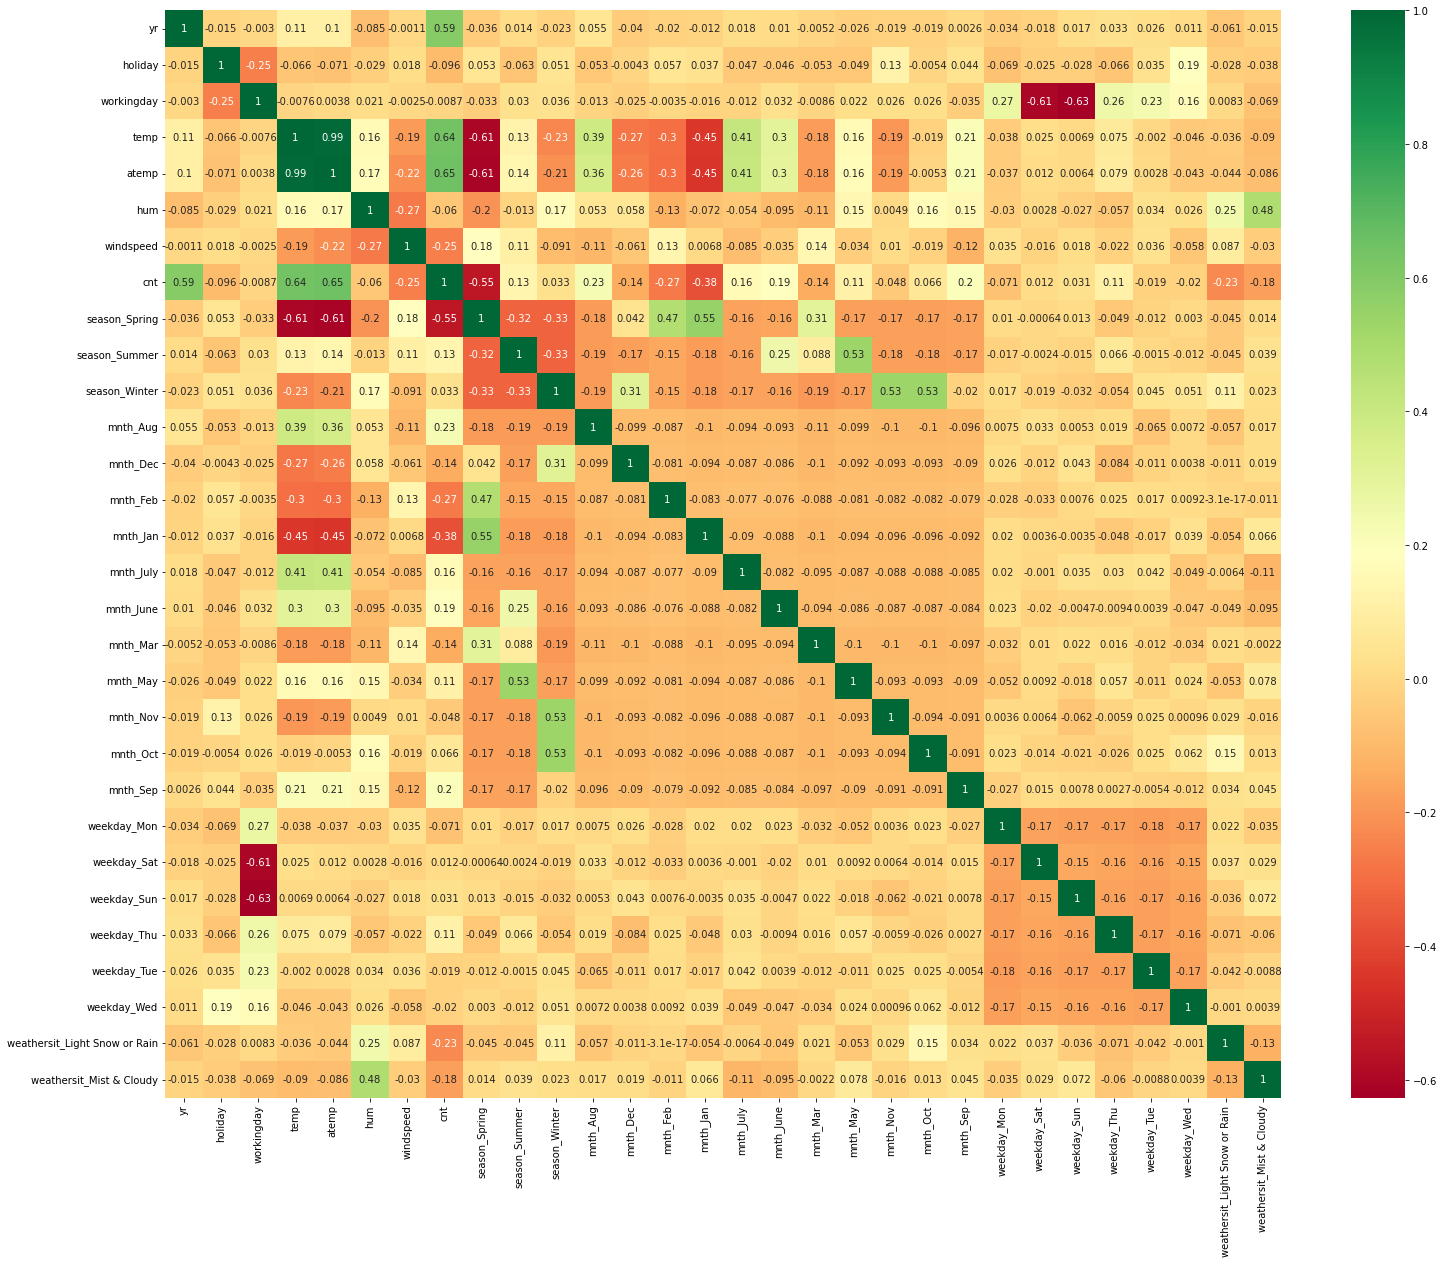

In [31]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(bk_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

###### As we can see in the heatmap, `temp`  and `atemp` seem to be correlated to `cnt` the most.

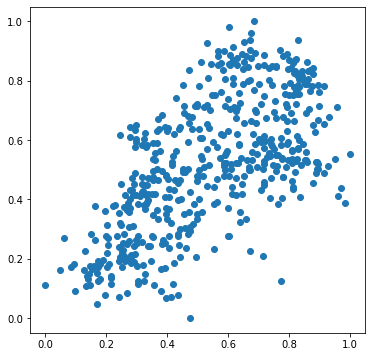

In [32]:
# Visualizing temp vs cnt correlation via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(bk_train.temp, bk_train.cnt)
plt.show()

## Step 5: Building a linear model using stats model

In [33]:
# Building the Linear Model

y_train = bk_train.pop('cnt')
X_train = bk_train

In [34]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 15)
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', False, 2),
 ('season_Summer', False, 2),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 2),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_July', False, 2),
 ('mnth_June', False, 2),
 ('mnth_Mar', False, 2),
 ('mnth_May', False, 2),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 2),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 2),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 2),
 ('weekday_Tue', False, 2),
 ('weekday_Wed', False, 2),
 ('weathersit_Light Snow or Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

In [36]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_Winter', 'mnth_Jan', 'mnth_Sep', 'weekday_Sat', 'weekday_Sun',
       'weathersit_Light Snow or Rain', 'weathersit_Mist & Cloudy'],
      dtype='object')

In [37]:
X_train.columns[~rfe.support_]

Index(['season_Spring', 'season_Summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'weekday_Mon', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [38]:
# Create function to calculate VIF of variables

def calVIF(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

### Building model using statsmodel, for the detailed statistics

In [39]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

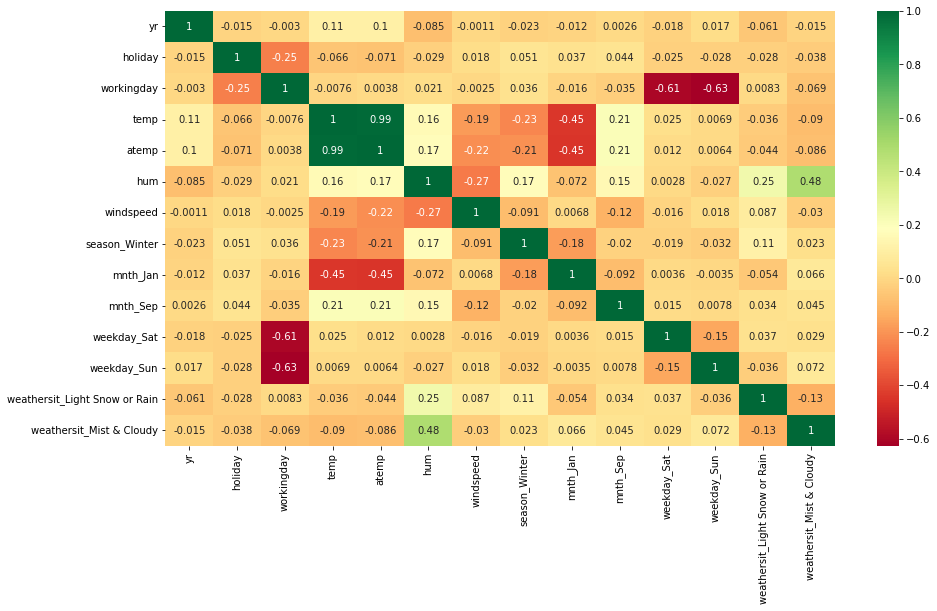

In [40]:
# Check for correlation in RFE selected variables
plt.figure(figsize=(15,8))
sns.heatmap(X_train[col].corr(),annot = True, cmap="RdYlGn")
plt.show()

#### 'hum' has high correlation with 'weathersit_Mist & Cloudy', either one of the variables has to be removed

In [41]:
calVIF(X_train_rfe)

,Features,VIF
4,atemp,356.18
3,temp,345.79
5,hum,35.58
2,workingday,30.63
11,weekday_Sun,6.39
10,weekday_Sat,6.08
6,windspeed,5.38
13,weathersit_Mist & Cloudy,2.36
0,yr,2.07
1,holiday,1.76


In [42]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [43]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

print(lm.summary()) # Summary of the linear model

#### While modelling we will notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and will be dropped.

#### Model 2 - Removing 'atemp' - highly positive linear relationship between temp and atemp

In [45]:
# Since we had already noted the highly positive linear relationship between temp and atemp, we will remove atemp and check
# the VIF and p values again

X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
calVIF(X_train_new)

,Features,VIF
0,const,367.31
3,workingday,64.32
11,weekday_Sun,36.89
10,weekday_Sat,35.11
2,holiday,6.60
5,hum,1.88
4,temp,1.71
13,weathersit_Mist & Cloudy,1.57
8,mnth_Jan,1.44
7,season_Winter,1.31


In [46]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_new).fit() 

In [47]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     174.4
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          1.98e-175
Time:                        23:27:49   Log-Likelihood:                 476.45
No. Observations:                 510   AIC:                            -924.9
Df Residuals:                     496   BIC:                            -865.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

#### Model 3 - Removing 'workingday' - high VIF & p-value

In [48]:
X_train_new = X_train_new.drop(['workingday'], axis = 1)
calVIF(X_train_new)

,Features,VIF
0,const,50.10
4,hum,1.87
3,temp,1.71
12,weathersit_Mist & Cloudy,1.57
7,mnth_Jan,1.44
6,season_Winter,1.29
11,weathersit_Light Snow or Rain,1.24
5,windspeed,1.18
8,mnth_Sep,1.07
10,weekday_Sun,1.04


In [49]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit() 

In [50]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     189.1
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          1.68e-176
Time:                        23:27:49   Log-Likelihood:                 476.27
No. Observations:                 510   AIC:                            -926.5
Df Residuals:                     497   BIC:                            -871.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

#### Model 4 - Removing 'weekday_Sat' - high p-value

In [51]:
X_train_new = X_train_new.drop(['weekday_Sat'], axis = 1)
calVIF(X_train_new)

,Features,VIF
0,const,49.64
4,hum,1.87
3,temp,1.71
11,weathersit_Mist & Cloudy,1.56
7,mnth_Jan,1.44
6,season_Winter,1.29
10,weathersit_Light Snow or Rain,1.23
5,windspeed,1.18
8,mnth_Sep,1.07
1,yr,1.03


In [52]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit() 

In [53]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     206.1
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          2.05e-177
Time:                        23:27:50   Log-Likelihood:                 475.66
No. Observations:                 510   AIC:                            -927.3
Df Residuals:                     498   BIC:                            -876.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

#### Model 5 - Removing 'weekday_Sun' - high p- value

In [54]:
X_train_new = X_train_new.drop(['weekday_Sun'], axis = 1)
calVIF(X_train_new)

,Features,VIF
0,const,49.22
4,hum,1.86
3,temp,1.71
10,weathersit_Mist & Cloudy,1.55
7,mnth_Jan,1.44
6,season_Winter,1.29
9,weathersit_Light Snow or Rain,1.23
5,windspeed,1.18
8,mnth_Sep,1.07
1,yr,1.03


In [55]:
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_new).fit() 

In [56]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     226.4
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          2.72e-178
Time:                        23:27:51   Log-Likelihood:                 474.93
No. Observations:                 510   AIC:                            -927.9
Df Residuals:                     499   BIC:                            -881.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

#### Model 6 - Removing 'hum' - refer to heatmap - 'hum' has high correlation with 'weathersit_Mist & Cloudy'

In [57]:
X_train_new = X_train_new.drop(['hum'], axis = 1)
calVIF(X_train_new)

,Features,VIF
0,const,21.93
3,temp,1.61
6,mnth_Jan,1.43
5,season_Winter,1.24
4,windspeed,1.10
7,mnth_Sep,1.07
8,weathersit_Light Snow or Rain,1.05
9,weathersit_Mist & Cloudy,1.04
1,yr,1.02
2,holiday,1.01


 ##### All VIF are under 5. We can ignore the VIF for 'const' since it's not a predictor variable

In [58]:
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_new).fit() 

In [59]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     244.1
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          1.18e-176
Time:                        23:27:52   Log-Likelihood:                 468.22
No. Observations:                 510   AIC:                            -916.4
Df Residuals:                     500   BIC:                            -874.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

#### We can consider the above model as it seems to have very low multicollinearity between the predictors. VIF is < 5 for all predictors and the p-values for all the predictors is < 0.05.

#### F-Statistics value of 244.1 (which is greater than 1) and Prob (F-statistic):  1.18e-176 i.e almost equals to zero, states that the overall model is significant

## Step 6: Residual Analysis of the train data and validation

In [60]:
y_train_pred = lm.predict(X_train_new)

#### Normality of Error

Text(0.5, 0, 'Errors')

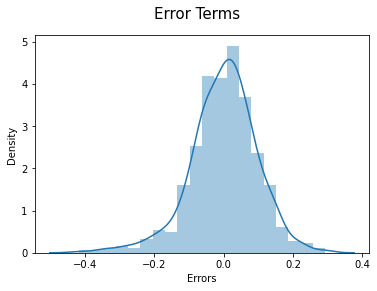

In [61]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 15) 
plt.xlabel('Errors', fontsize = 10)

Error terms are following normal distribution

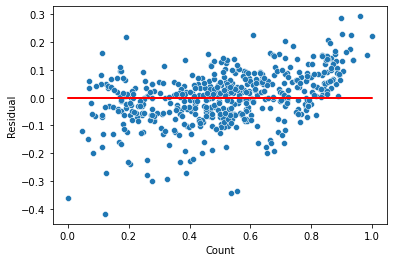

In [62]:
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

## Step 8: Making Predictions Using the Final Model

In [63]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

bk_test[num_vars] = scaler.fit_transform(bk_test[num_vars])
bk_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow or Rain,weathersit_Mist & Cloudy
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,1,0,0,0,0,0,0


In [64]:
bk_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow or Rain,weathersit_Mist & Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.546312,0.530942,0.508750,0.418870,0.516216,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.249189,0.228159,0.201253,0.188111,0.238702,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [65]:
y_test = bk_test.pop('cnt')
X_test = bk_test

In [66]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   yr                             219 non-null    int64  
 1   holiday                        219 non-null    int64  
 2   workingday                     219 non-null    int64  
 3   temp                           219 non-null    float64
 4   atemp                          219 non-null    float64
 5   hum                            219 non-null    float64
 6   windspeed                      219 non-null    float64
 7   season_Spring                  219 non-null    uint8  
 8   season_Summer                  219 non-null    uint8  
 9   season_Winter                  219 non-null    uint8  
 10  mnth_Aug                       219 non-null    uint8  
 11  mnth_Dec                       219 non-null    uint8  
 12  mnth_Feb                       219 non-null    ui

In [67]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_Winter',
       'mnth_Jan', 'mnth_Sep', 'weathersit_Light Snow or Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [74]:
X_train_new = X_train_new.drop(['const'], axis = 1)

In [75]:
#Selecting the variables that were part of final model.
col_test = X_train_new.columns

In [77]:
X_test = X_test[col_test]

# Adding constant variable to test dataframe

X_test_lm = sm.add_constant(X_test)

In [78]:
# Making predictions using the final model

y_pred = lm.predict(X_test_lm)

In [79]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7606

In [80]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7503


## Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

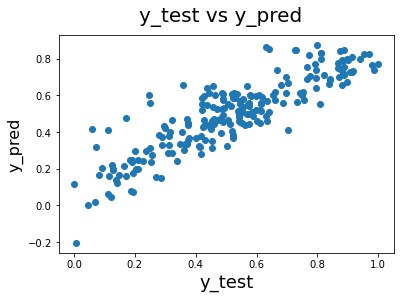

In [81]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [82]:
lm.params

const                            0.183025
yr                               0.234223
holiday                         -0.103713
temp                             0.512596
windspeed                       -0.150950
season_Winter                    0.088396
mnth_Jan                        -0.079696
mnth_Sep                         0.074901
weathersit_Light Snow or Rain   -0.286895
weathersit_Mist & Cloudy        -0.073591
dtype: float64

### We can see that the equation of our best fitted line is:

###### cnt = 0.183025 + 0.234223 * yr - 0.103713 * holiday + 0.512596 * temp - 0.150950 * windspeed + 0.088396 * season_Winter  - 0.079696 * mnth_Jan + 0.074901 * mnth_Sep - 0.286895 * weathersit_Light Snow or Rain -0.073591 * weathersit_Mist & Cloudy 

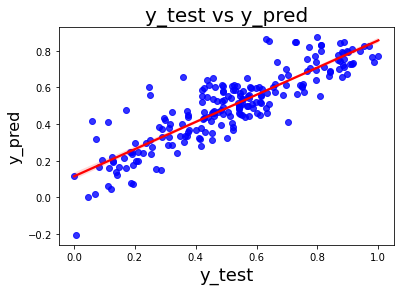

In [83]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Comparison between Training and Testing dataset:
    - Train dataset R^2          : 0.815
    - Test dataset R^2           : 0.7606
    - Train dataset Adjusted R^2 : 0.811    
    - Test dataset Adjusted R^2  : 0.7503
    
#### Overall we have a decent model, but we also acknowledge that we could do better.

#### Demand of rental bikes depend on year,  temp, season, month, holiday, windspeed  & weathersit.